In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Importing all required tools for this project

In [2]:
app = pd.read_csv('application_record.csv') 
credit = pd.read_csv('credit_record.csv')  

In [4]:
# Bringing in the data (two seperate datasets)

In [3]:
df = pd.merge(app, credit, on="ID")

In [6]:
# Merging the two datasets based on a shared ID number

In [4]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


In [8]:
# Getting a glimpse of the data

In [5]:
df.rename(columns = {'CODE_GENDER':'GENDER', 'FLAG_OWN_CAR':'CAR', 'FLAG_OWN_REALTY':'REALTY','CNT_CHILDREN':'CHILDREN',
                    'AMT_INCOME_TOTAL':'INCOME', 'NAME_INCOME_TYPE':'INCOME_TYPE','NAME_EDUCATION_TYPE':'EDUCATION',
                       'NAME_FAMILY_STATUS': 'MARITAL_STATUS', 'NAME_HOUSING_TYPE': 'HOUSING_TYPE', 
                       'DAYS_BIRTH':'DAYS_SINCE_BIRTH', 'FLAG_MOBIL':'MOBILE_PHONE', 'FLAG_WORK_PHONE':'WORK_PHONE',
                       'FLAG_PHONE':'PHONE', 'FLAG_EMAIL': 'EMAIL', 'CNT_FAM_MEMBERS': 'FAM_SIZE'
                      }, inplace = True)

In [ ]:
# Renaming many of the columns to be more concise.

In [6]:
df.drop(['MOBILE_PHONE', 'OCCUPATION_TYPE'], axis=1, inplace=True)

In [ ]:
# Dropping the mobile phone column (all the same values) and occupation type (too much missing data)

In [7]:
df.head()

,ID,GENDER,CAR,REALTY,CHILDREN,INCOME,INCOME_TYPE,EDUCATION,MARITAL_STATUS,HOUSING_TYPE,DAYS_SINCE_BIRTH,DAYS_EMPLOYED,WORK_PHONE,PHONE,EMAIL,FAM_SIZE,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,2.0,-4,C


In [ ]:
# Viewing the data to check that the removal of these columns went smoothly

In [8]:
df.GENDER.groupby(df.GENDER).count()

GENDER
F    518851
M    258864
Name: GENDER, dtype: int64

In [ ]:
# Seeing the distribution of gender

In [9]:
df.CAR.groupby(df.CAR).count()

CAR
N    473355
Y    304360
Name: CAR, dtype: int64

In [ ]:
# Seeing the distribution of car ownership

In [10]:
df.REALTY.groupby(df.REALTY).count()

REALTY
N    264767
Y    512948
Name: REALTY, dtype: int64

In [ ]:
# Seeing the distribution of realty ownership

In [11]:
df.MARITAL_STATUS.groupby(df.MARITAL_STATUS).count()

MARITAL_STATUS
Civil marriage           60342
Married                 546619
Separated                45255
Single / not married     94335
Widow                    31164
Name: MARITAL_STATUS, dtype: int64

In [ ]:
# Seeing the distribution of marital statuses

In [12]:
df.INCOME_TYPE.groupby(df.INCOME_TYPE).count()

INCOME_TYPE
Commercial associate    183385
Pensioner               128392
State servant            65437
Student                    337
Working                 400164
Name: INCOME_TYPE, dtype: int64

In [ ]:
# Seeing the distribution of income types

In [13]:
df.HOUSING_TYPE.groupby(df.HOUSING_TYPE).count()

HOUSING_TYPE
Co-op apartment          3655
House / apartment      697151
Municipal apartment     24640
Office apartment         5636
Rented apartment        10898
With parents            35735
Name: HOUSING_TYPE, dtype: int64

In [ ]:
# Seeing the distribution of housing types

In [14]:
df.EDUCATION.groupby(df.EDUCATION).count()

EDUCATION
Academic degree                     837
Higher education                 213633
Incomplete higher                 30329
Lower secondary                    8655
Secondary / secondary special    524261
Name: EDUCATION, dtype: int64

In [ ]:
# Seeing the distribution of levels of education

In [15]:
df.STATUS.groupby(df.STATUS).count()

STATUS
0    290654
1      8747
2       801
3       286
4       214
5      1527
C    329536
X    145950
Name: STATUS, dtype: int64

In [ ]:
# Seeing the distribution of status (the response variable)

In [16]:
data = pd.get_dummies(df,columns=['GENDER','CAR','REALTY','HOUSING_TYPE','INCOME_TYPE','MARITAL_STATUS','EDUCATION'])

In [ ]:
# Getting dummy variables for all of the categorical columns

In [17]:
data

,ID,CHILDREN,INCOME,DAYS_SINCE_BIRTH,DAYS_EMPLOYED,WORK_PHONE,PHONE,EMAIL,FAM_SIZE,MONTHS_BALANCE,...,MARITAL_STATUS_Civil marriage,MARITAL_STATUS_Married,MARITAL_STATUS_Separated,MARITAL_STATUS_Single / not married,MARITAL_STATUS_Widow,EDUCATION_Academic degree,EDUCATION_Higher education,EDUCATION_Incomplete higher,EDUCATION_Lower secondary,EDUCATION_Secondary / secondary special
0,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,0,...,1,0,0,0,0,0,1,0,0,0
1,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,-1,...,1,0,0,0,0,0,1,0,0,0
2,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,-2,...,1,0,0,0,0,0,1,0,0,0
3,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,-3,...,1,0,0,0,0,0,1,0,0,0
4,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,-4,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,-9,...,0,0,0,1,0,0,0,0,0,1
777711,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,-10,...,0,0,0,1,0,0,0,0,0,1
777712,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,-11,...,0,0,0,1,0,0,0,0,0,1
777713,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,-12,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
# Checking the dummy variables

In [18]:
n = data.nunique(axis=0)
 
print("No.of.unique values in each column :\n",
      n)

No.of.unique values in each column :
 ID                                         36457
CHILDREN                                       9
INCOME                                       265
DAYS_SINCE_BIRTH                            7183
DAYS_EMPLOYED                               3640
WORK_PHONE                                     2
PHONE                                          2
EMAIL                                          2
FAM_SIZE                                      10
MONTHS_BALANCE                                61
STATUS                                         8
GENDER_F                                       2
GENDER_M                                       2
CAR_N                                          2
CAR_Y                                          2
REALTY_N                                       2
REALTY_Y                                       2
HOUSING_TYPE_Co-op apartment                   2
HOUSING_TYPE_House / apartment                 2
HOUSING_TYPE_Municipal apartmen

In [ ]:
# Viewing the number of unique values in each column (another check of dummy variables)

In [19]:
data.rename(columns = {'GENDER_F':'FEMALE','GENDER_M':'MALE',
                     
                    'HOUSING_TYPE_Co-op apartment':'CO-OP_APARTMENT', 'HOUSING_TYPE_House / apartment':'HOUSE/APARTMENT',
                     'HOUSING_TYPE_Municipal apartment':'MUNICIPAL_APARTMENT',
                    'HOUSING_TYPE_Office apartment':'OFFICE_APARTMENT','HOUSING_TYPE_Rented apartment':'RENTED_APARTMENT',
                     'HOUSING_TYPE_With parents':'LIVING_W_PARENTS',
                       
                    'INCOME_TYPE_Commercial associate':'INCTYPE_COMMERCIAL_ASSOCIATE',
                     'INCOME_TYPE_Pensioner':'INCTYPE_PENSIONER','INCOME_TYPE_State servant':'INCTYPE_STATE_SERVANT',
                    'INCOME_TYPE_Student':'INCTYPE_STUDENT','INCOME_TYPE_Working':'INCTYPE_WORKING',
                       
                    'MARITAL_STATUS_Civil marriage':'MSTATUS_CIVIL_MARRIAGE','MARITAL_STATUS_Married':'MSTATUS_MARRIED', 
                     'MARITAL_STATUS_Separated':'MSTATUS_SEPARATED','MARITAL_STATUS_Single / not married':'MSTATUS_SINGLE',
                    'MARITAL_STATUS_Widow':'MSTATUS_WIDOW',
                      
                    'EDUCATION_Academic degree':'EDU_DEGREE','EDUCATION_Higher education':'EDU_COMPLETE_HIGHER',
                     'EDUCATION_Incomplete higher':'EDU_INCOMPLETE_HIGHER','EDUCATION_Lower secondary':'EDU_LOW_SECONDARY',
                    'EDUCATION_Secondary / secondary special': 'EDU_SECONDARY'
                       
                      }, inplace = True)

In [ ]:
# Renaming dummy columns to be more concise

In [20]:
n = data.nunique(axis=0)
 
print("No.of.unique values in each column :\n", n)

No.of.unique values in each column :
 ID                              36457
CHILDREN                            9
INCOME                            265
DAYS_SINCE_BIRTH                 7183
DAYS_EMPLOYED                    3640
WORK_PHONE                          2
PHONE                               2
EMAIL                               2
FAM_SIZE                           10
MONTHS_BALANCE                     61
STATUS                              8
FEMALE                              2
MALE                                2
CAR_N                               2
CAR_Y                               2
REALTY_N                            2
REALTY_Y                            2
CO-OP_APARTMENT                     2
HOUSE/APARTMENT                     2
MUNICIPAL_APARTMENT                 2
OFFICE_APARTMENT                    2
RENTED_APARTMENT                    2
LIVING_W_PARENTS                    2
INCTYPE_COMMERCIAL_ASSOCIATE        2
INCTYPE_PENSIONER                   2
INCTYPE_STAT

In [ ]:
# Checking the updated dummy column names 

In [21]:
data.head()

,ID,CHILDREN,INCOME,DAYS_SINCE_BIRTH,DAYS_EMPLOYED,WORK_PHONE,PHONE,EMAIL,FAM_SIZE,MONTHS_BALANCE,...,MSTATUS_CIVIL_MARRIAGE,MSTATUS_MARRIED,MSTATUS_SEPARATED,MSTATUS_SINGLE,MSTATUS_WIDOW,EDU_DEGREE,EDU_COMPLETE_HIGHER,EDU_INCOMPLETE_HIGHER,EDU_LOW_SECONDARY,EDU_SECONDARY
0,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,0,...,1,0,0,0,0,0,1,0,0,0
1,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,-1,...,1,0,0,0,0,0,1,0,0,0
2,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,-2,...,1,0,0,0,0,0,1,0,0,0
3,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,-3,...,1,0,0,0,0,0,1,0,0,0
4,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,-4,...,1,0,0,0,0,0,1,0,0,0


In [22]:
data['LATE'] = data['STATUS'].apply(lambda x: 0 if x in ['0','C','X'] else 1)

In [ ]:
# Created a new column indicating whether the payment was late (1 for late, 0 for not late)

In [23]:
data.STATUS.groupby(df.STATUS).count()

STATUS
0    290654
1      8747
2       801
3       286
4       214
5      1527
C    329536
X    145950
Name: STATUS, dtype: int64

In [ ]:
# Viewing the numbers associated with each status to compare with the numbers in the newly created "LATE" column.

In [24]:
data.LATE.groupby(data.LATE).count()

LATE
0    766140
1     11575
Name: LATE, dtype: int64

In [69]:
# Checking to make sure the new column has the correct number associated with its "late" and "not late" labels

In [25]:
data

,ID,CHILDREN,INCOME,DAYS_SINCE_BIRTH,DAYS_EMPLOYED,WORK_PHONE,PHONE,EMAIL,FAM_SIZE,MONTHS_BALANCE,...,MSTATUS_MARRIED,MSTATUS_SEPARATED,MSTATUS_SINGLE,MSTATUS_WIDOW,EDU_DEGREE,EDU_COMPLETE_HIGHER,EDU_INCOMPLETE_HIGHER,EDU_LOW_SECONDARY,EDU_SECONDARY,LATE
0,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,0,...,0,0,0,0,0,1,0,0,0,0
1,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,-1,...,0,0,0,0,0,1,0,0,0,0
2,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,-2,...,0,0,0,0,0,1,0,0,0,0
3,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,-3,...,0,0,0,0,0,1,0,0,0,0
4,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,-4,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,-9,...,0,0,1,0,0,0,0,0,1,0
777711,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,-10,...,0,0,1,0,0,0,0,0,1,1
777712,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,-11,...,0,0,1,0,0,0,0,0,1,1
777713,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,-12,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Checking the data again to make sure everything looks as it should.

In [26]:
data.drop(['STATUS'], axis=1, inplace=True)

In [ ]:
# Dropping the "STATUS" column from the data - this column is directly correlated with the y variable, so it cannot be
# included in any logistic regression model.

In [27]:
data.dtypes

ID                                int64
CHILDREN                          int64
INCOME                          float64
DAYS_SINCE_BIRTH                  int64
DAYS_EMPLOYED                     int64
WORK_PHONE                        int64
PHONE                             int64
EMAIL                             int64
FAM_SIZE                        float64
MONTHS_BALANCE                    int64
FEMALE                            uint8
MALE                              uint8
CAR_N                             uint8
CAR_Y                             uint8
REALTY_N                          uint8
REALTY_Y                          uint8
CO-OP_APARTMENT                   uint8
HOUSE/APARTMENT                   uint8
MUNICIPAL_APARTMENT               uint8
OFFICE_APARTMENT                  uint8
RENTED_APARTMENT                  uint8
LIVING_W_PARENTS                  uint8
INCTYPE_COMMERCIAL_ASSOCIATE      uint8
INCTYPE_PENSIONER                 uint8
INCTYPE_STATE_SERVANT             uint8


In [ ]:
# checking the data types of all variables. After the conversions to dummy variables and the removal of 'STATUS",
# all variables are now able to be used for regression.

# First, we will run a Decision Tree regression model. The following lines create this model and show its accuracy.

In [28]:
x = data.values[:, 0:36]
y = data.values[:,-1:]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,
                                                   random_state = 100)

In [30]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy",
random_state = 100, max_depth=3, min_samples_leaf=5)

In [31]:
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [32]:
y_pred_en = clf_entropy.predict(x_test)

In [33]:
y_pred_en

array([0., 0., 0., ..., 0., 0., 0.])

In [34]:
print (("Accuracy Score:"), accuracy_score(y_test, y_pred_en))

Accuracy Score: 0.9852174099393524


In [ ]:
# Despite the high accuracy score, this is not a good model. Approximately 98.5% of the rows have a "LATE" value of zero,
# which means ~98.5% of the datapoints are not late. So, a model which guessed that every individual would not be late 
# would have approximately the same accuracy as this model.

In [ ]:
# Next we will run a K-nearest-neighbors model. This will hopefully be more accurate than our decision tree model.

In [35]:
x_train, x_test, y_train,y_test = train_test_split(x,y, random_state=104,
                                                   test_size = 0.20,
                                                   shuffle=True)

In [36]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, random_state=104,
                                                test_size=0.50,
                                                shuffle=True)

In [37]:
print(len(x_train), len(x_test), len(x_val))

622172 77771 77772


In [38]:
neigh = KNeighborsClassifier(n_neighbors=4)

In [39]:
neigh.fit(x_train, y_train)

C:\Users\pucke\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [40]:
y_pred = neigh.predict(x_test)

In [41]:
accuracy_score(y_test, y_pred)

0.9871545949004128

In [ ]:
# Although this is slightly better than the result we obtained from the decision tree model, it is still not very good.

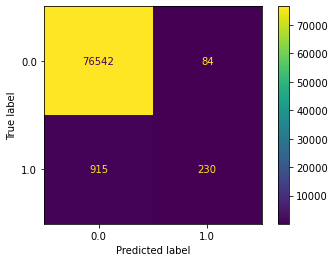

In [42]:
cm = confusion_matrix(y_test, y_pred, labels=neigh.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)
disp.plot()

In [ ]:
# Here we can see a confusion matrix which breaks down the distributions of true and predicted values with their overlap.
# As mentioned above, this is not a very good model.